# Домашнее задание 4 - предобработка признаков, pandas

**Студент:** Феоктистов Владислав

**Группа:** НПМбд-01-19б

Дата выдачи: 28.09.2022

Срок сдачи: 09.10.2022 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW4_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW4_IvanovII.ipynb*). Необходимо выложить файл с решением в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    indices = (arr == 0)
    indices = np.roll(indices, 1)
    indices[0] = False
    short_arr = arr[indices]
    m = max(short_arr)
    if len(short_arr) != 0 and m != 0:
           return m
    else:
           return None

In [3]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_element(x)

5

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [4]:
def nearest_value(X, v):
    Y = np.abs(X - v)
    i = np.argmin(Y)
#     return X[i // Y.shape[1], i % Y.shape[1]]
    return X.flatten()[i]

In [5]:
X = np.arange(0,10).reshape((2, 5))
v = 3.6
nearest_value(X, v)

4

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [6]:
def scale(X, axis=0):
    means = np.mean(X, axis=axis)
    stds = np.std(X, axis=axis)
    if not 0 in stds:
        return (X - means) / stds
    else:
        print('Array stds:', stds)
        raise ZeroDivisionError('Array std has zero value. Matrix (X - avr) cannot be divided by zero that contains in array std!')

In [7]:
X = np.random.randint(1, 100, (4, 4))
print(scale(X))

print('===========================')

X = np.random.randint(1, 2, (4, 4))
print(scale(X))

[[ 0.02356368 -1.57712318 -0.27252813  1.35553536]
 [-1.24887512  1.19047363  1.66154247 -0.56845031]
 [-0.30632786  0.09157489 -0.37802289 -1.26808146]
 [ 1.5316393   0.29507466 -1.01099145  0.48099642]]
Array stds: [0. 0. 0. 0.]


ZeroDivisionError: Array std has zero value. Matrix (X - avr) cannot be divided by zero that contains in array std!

**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [8]:
def get_stats(X):
    return np.linalg.det(X), np.trace(X), np.min(X), np.max(X), np.linalg.norm(X), np.linalg.eig(X)[0], np.linalg.inv(X)

def show_stats(X):
    det, trace, min, max, norm, l, inv_X = get_stats(X)
    print('Определитель =', det)
    print('След =', trace)
    print('Наименьший элемент:', min)
    print('Наибольший элемент:', max)
    print('Норма Фробениуса =', norm)
    print('Собственные числа:\n', l)
    print('Обратная матрица:\n', inv_X)

In [9]:
X = np.random.normal(10, 1, size=(5, 5))

show_stats(X)

Определитель = 1.001265135313357
След = 51.86800794270197
Наименьший элемент: 7.863403401575043
Наибольший элемент: 12.988027685435181
Норма Фробениуса = 51.15672112081134
Собственные числа:
 [ 5.08878026e+01+0.j          2.74760865e+00+0.j
 -8.87265118e-01+0.46643612j -8.87265118e-01-0.46643612j
  7.12688927e-03+0.j        ]
Обратная матрица:
 [[  -6.02339195  -22.61482615  104.09322821   72.05638235 -146.73173033]
 [   3.2159447    11.52082916  -56.73980391  -39.30092482   80.92816383]
 [   2.38413652    8.61950851  -37.84041629  -26.43927285   53.03265664]
 [  -3.86792923  -14.63714013   69.938769     48.98844406  -99.95358896]
 [   4.67339686   18.47241668  -86.082812    -59.9229143   122.28576096]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [10]:
max_vals = []
for exp_num in range(100):
    X = np.random.normal(10, 1, size=(10, 10))
    Y = np.random.normal(10, 1, size=(10, 10)) 
    max_vals.append(np.max(X @ Y))
max_vals = np.array(max_vals)
mean = max_vals.mean()
print('Среднее:', mean)
print('95% квантиль:', np.quantile(max_vals, q=0.95))
# print('95% квантиль:', np.percentile(max_vals, 95))

Среднее: 1099.5397534837991
95% квантиль: 1145.6043296079142


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [11]:
import pandas as pd
%matplotlib inline

In [12]:
df = pd.read_csv('2008.csv')
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [13]:
print('Самая частая причина отмены рейса:', df['CancellationCode'].value_counts().idxmax())

Самая частая причина отмены рейса: A


In [14]:
df.groupby("CancellationCode")["Cancelled"].sum()

CancellationCode
A    563
B    549
C    299
Name: Cancelled, dtype: int64

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [15]:
print('Среднее расстояние, пройденное самолетом:', df['Distance'].mean())
print('Минимальное расстояние, пройденное самолетом:', df['Distance'].min())
print('Максимальное расстояние, пройденное самолетом:', df['Distance'].max())

Среднее расстояние, пройденное самолетом: 724.5082571428571
Минимальное расстояние, пройденное самолетом: 31
Максимальное расстояние, пройденное самолетом: 4962


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

Минимальное пройденное расстояние = 31 мили = 49,89 км, что достаточно мало. Возможно, речь идет о частных самолетах или самолетах для пересадок.

In [16]:
df_tmp = df[df['Distance'] == df['Distance'].min()].loc[:, ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum']]
print('Подозрительные рейсы:')
df_tmp

Подозрительные рейсы:


,Year,Month,DayofMonth,DayOfWeek,FlightNum
1116,2008,12,30,2,65
6958,2008,12,26,5,65
17349,2008,8,18,1,64
27534,2008,3,11,2,64
46082,2008,8,9,6,65
48112,2008,2,28,4,64


Отдельно стоит посмотреть откуда и куда эти самолеты летели.

In [17]:
df[df['Distance'] == df['Distance'].min()].loc[:, ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'Origin', 'Dest']]

,Year,Month,DayofMonth,DayOfWeek,FlightNum,Origin,Dest
1116,2008,12,30,2,65,WRG,PSG
6958,2008,12,26,5,65,WRG,PSG
17349,2008,8,18,1,64,PSG,WRG
27534,2008,3,11,2,64,PSG,WRG
46082,2008,8,9,6,65,WRG,PSG
48112,2008,2,28,4,64,PSG,WRG


Полеты совершались между двумя аэропортами: WRG и PSG, - между которыми расстояние как раз 31 миля. Подробнее на сайте: https://www.airmilescalculator.com/distance/wrg-to-psg/

In [18]:
flightNums = set(df_tmp['FlightNum'])
print('Те же самолеты в другие дни:')
for flightNum in flightNums:
        print("Самолет №", flightNum, ":\n", df[(df['FlightNum'] == flightNum) &
                (df['Distance'] != df['Distance'].min())].loc[:, ['Year', 'Month', 'DayofMonth', 'DayOfWeek']], "\n", sep='')

Те же самолеты в другие дни:
Самолет №64:
       Year  Month  DayofMonth  DayOfWeek
501    2008      3          20          4
1389   2008      3          13          4
2619   2008      5          23          5
3869   2008      7           1          2
4025   2008      6          15          7
4466   2008      6          29          7
6778   2008      7          12          6
7891   2008      4           6          7
7977   2008      7           9          3
8448   2008      2          10          7
9615   2008      1           4          5
10833  2008      3          31          1
12352  2008      1          14          1
12980  2008      8           6          3
13155  2008      7           2          3
21304  2008      5          13          2
24750  2008      8          21          4
25671  2008      1          15          2
26323  2008     12          15          1
29801  2008      4          23          3
30053  2008      1           4          5
31375  2008      3          30    

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [19]:
from lxml import html
import requests
  
# Get airport code from DataFrame df
airport_code = df['Origin'].value_counts().idxmax()

url = 'https://www.iata.org/en/publications/directories/code-search/?airport.search=' + airport_code
    
# Request the page
response = requests.get(url)

if response:  
    # Parsing the page
    # (We need to use page.content rather than 
    # page.text because html.fromstring implicitly
    # expects bytes as input.)
    tree = html.fromstring(response.content)  

    # Get element using XPath
    city_name = tree.xpath('//table[@class="datatable"]/tbody/tr/td[1]/text()')
    
print('Аэропорт, из котрого было произведено больше всего вылетов:', airport_code)
print('Город аэропорта, из котрого было произведено больше всего вылетов:', city_name[0])

Аэропорт, из котрого было произведено больше всего вылетов: ATL
Город аэропорта, из котрого было произведено больше всего вылетов: Atlanta


Информацию о аэропортах можно так же получить через таблицу, скачав ее на сайте: http://stat-computing.org/dataexpo/2009/supplemental-data.html

In [20]:
airports = pd.read_csv('airports.csv')
print('Город аэропорта, из котрого было произведено больше всего вылетов:', 
      airports[airports['iata'] == airport_code]['city'].values[0])

Город аэропорта, из котрого было произведено больше всего вылетов: Atlanta


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [21]:
avr_fligh_series = df.groupby('Origin')['AirTime'].mean()
# print('Среднее время полета для каждого аэропорта:\n', avr_fligh_series.to_string(header=False))
print('Среднее время полета для каждого аэропорта:\n', avr_fligh_series)
print('\nАэропорт с наибольшим значение этого показателя:', *avr_fligh_series[avr_fligh_series == avr_fligh_series.max()].keys())

Среднее время полета для каждого аэропорта:
 Origin
ABE    88.266667
ABI    36.400000
ABQ    93.454321
ABY    35.714286
ACK    50.800000
         ...    
WRG    18.000000
XNA    85.945736
YAK    35.900000
YKM    79.000000
YUM    47.470588
Name: AirTime, Length: 297, dtype: float64

Аэропорт с наибольшим значение этого показателя: SJU


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [22]:
airport_flight_count = df.groupby('Origin')['FlightNum'].count()

ser1 = airport_flight_count[airport_flight_count >= 1000]
ser2 = df[(df['DepDelay'] > 0) & (df['Origin'].isin(ser1.keys()))].groupby('Origin')['FlightNum'].count()

res = (ser2 / ser1).sort_values()[::-1]
print(res)
print('\nАэропорт с наибольшей долей задержанных рейсов и с общим \
количеством отправленных рейсов больше 1000:', *res.head(1).keys())

Origin
EWR    0.511159
IAH    0.468524
ORD    0.464507
DFW    0.459363
BWI    0.452519
DEN    0.446076
SEA    0.438830
LAS    0.434467
PHX    0.422452
ATL    0.420658
PHL    0.420643
LAX    0.412584
MCO    0.401345
CLT    0.398400
SFO    0.396307
JFK    0.369692
MSP    0.366029
DTW    0.353416
BOS    0.323580
SLC    0.320000
LGA    0.306245
Name: FlightNum, dtype: float64

Аэропорт с наибольшей долей задержанных рейсов и с общим количеством отправленных рейсов больше 1000: EWR


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [23]:
df = pd.read_csv('2008.csv')

print("Есть ли в данных пропуски?", df.isnull().any().any())
print("Всего пропущенных элементов в таблице \"объект-признак\":", df.isna().sum().sum())
# print("Количество объектов, имеющих хотя бы один пропуск:", df.transpose().isna().any().sum())
print("Количество объектов, имеющих хотя бы один пропуск:", np.count_nonzero(np.array(df.isnull().sum(axis=1))))
# print("Количество признаков, имеющих хотя бы одно пропущенное значение:", df.isna().any().sum())
print("Количество признаков, имеющих хотя бы одно пропущенное значение:", np.count_nonzero(np.array(df.isnull().sum(axis=0))))

Есть ли в данных пропуски? True
Всего пропущенных элементов в таблице "объект-признак": 355215
Количество объектов, имеющих хотя бы один пропуск: 70000
Количество признаков, имеющих хотя бы одно пропущенное значение: 16


**Вывод:** все объеты имеют пропуски

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

Пропуски в признаке "DepDelay" вызваны отменами рейсов.

In [24]:
df_with_na_in_tv = df[df['DepDelay'].isna() == True]
df_with_na_in_tv

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [25]:
def isNaCol(df, col_name):
    return df[col_name].isna().all()

for col_name in ["DepTime", "ArrTime", "TaxiIn", "TaxiOut", "CarrierDelay", 
                 "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]:
    print('Признак', col_name, 'полностью пустой:', isNaCol(df_with_na_in_tv, col_name))

Признак DepTime полностью пустой: True
Признак ArrTime полностью пустой: True
Признак TaxiIn полностью пустой: True
Признак TaxiOut полностью пустой: True
Признак CarrierDelay полностью пустой: True
Признак WeatherDelay полностью пустой: True
Признак NASDelay полностью пустой: True
Признак SecurityDelay полностью пустой: True
Признак LateAircraftDelay полностью пустой: True


У всех объектов, где пропущены значения у целевой переменной, нет значений в признаках "DepTime", "ArrTime", "TaxiIn", "TaxiOut", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay", что очевидно, так как самолеты не вылетели по итогу.

In [26]:
def clear_df_by_tv(df, col_name):
    df_tmp = df.copy(deep=True)
    df_tmp = df_tmp[df_tmp[col_name].isna() == False]
    df_tmp = df_tmp[df_tmp[col_name] != 0]
    return df_tmp

def select_tv(df, col_name):
    df_tmp = df.copy(deep=True)
    # tv is target-vector
    tv = df_tmp[col_name]
    df_tmp = df_tmp.drop(col_name, axis=1)
    return df_tmp, tv

df_cleared_1 = clear_df_by_tv(df, 'DepDelay') # Таблица без пропущенных и нулевых значений в признаке "DepDelay"
df_without_tv, tv = select_tv(df_cleared_1, 'DepDelay') # df - таблица без признака "DepDelay", tv (target-vector) - series со значениями "DepDelay"

Поскольку мы убрали объекты с пустыми значениями в признаке "DepDelay", тем самым оставив только рейсы, которые были совершены, т.е. не отменены; то признаки "Cancelled" и "СancellationCode" можно исключить из таблицы. Также можно избавиться от столбца с индексами, поскольку это лишняя информация, неприводящая к нужному выводу.

In [27]:
df_cleared_2 = df_without_tv.copy(deep=True)
df_cleared_2.reset_index(inplace=True)
df_cleared_2.drop('index', axis=1, inplace=True)
df_cleared_2.drop('Cancelled', axis=1, inplace=True)
df_cleared_2.drop('CancellationCode', axis=1, inplace=True)
df_cleared_2

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,CLE,307,3.0,8.0,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,AVL,834,4.0,12.0,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,TPA,997,4.0,9.0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,FCA,532,4.0,19.0,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,AUS,1090,4.0,8.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,BDL,661,12.0,13.0,0,NaN,NaN,NaN,NaN,NaN
63400,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,ATL,606,22.0,20.0,0,NaN,NaN,NaN,NaN,NaN
63401,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,GRR,137,4.0,13.0,0,0.0,0.0,0.0,0.0,22.0
63402,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,MSP,1416,20.0,22.0,0,0.0,0.0,15.0,0.0,6.0


In [38]:
print(tv.isna().any())
tv

False


0        16.0
1        16.0
2        -2.0
3        -3.0
4        -5.0
         ... 
69994    -5.0
69995   -11.0
69996    24.0
69998     6.0
69999    -1.0
Name: DepDelay, Length: 63404, dtype: float64

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [28]:
def transformTime(df, col_name):
    df_temp = df.copy(deep=True)
    df_temp = df_temp.assign(TEMP_H=list(map(lambda el: el // 100 if not np.isnan(el) else None, list(df[col_name]))))
    df_temp = df_temp.assign(TEMP_M=list(map(lambda el: el % 100 if not np.isnan(el) else None, list(df[col_name]))))
    df_temp = df_temp.rename(columns={'TEMP_H': col_name+'_Hour', 'TEMP_M': col_name+'_Minute'})
    df_temp = df_temp.drop(col_name, axis=1)
    return df_temp

# def transformTime(df, col_name):
#     df_temp = df.copy(deep=True)
#     df_temp[col_name+'_Hour'] = df_temp.apply(lambda row: (row[col_name] // 100 if not np.isnan(row[col_name]) else None), axis=1)
#     df_temp[col_name+'_Minute'] = df_temp.apply(lambda row: (row[col_name] % 100 if not np.isnan(row[col_name]) else None), axis=1)
#     df_temp = df_temp.drop(col_name, axis=1)
#     return df_temp

df_transformed_time = df_cleared_2.copy(deep=True)
for col_name in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    df_transformed_time = transformTime(df_transformed_time, col_name)  
df_transformed_time

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11.0,20,55,23.0,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26.0,14,10,17.0,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43.0,11,45,15.0,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41.0,11,44,13.0,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,...,NaN,NaN,9.0,20.0,9,25,11.0,10.0,11,18
63400,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,...,NaN,NaN,18.0,29.0,18,40,21.0,37.0,21,49
63401,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,...,0.0,22.0,11.0,49.0,11,25,13.0,36.0,13,14
63402,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,...,0.0,6.0,19.0,6.0,19,0,22.0,0.0,21,39


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [29]:
import seaborn as sns

def corr_graph(df, numeric_features = None):
    df_tmp = df.copy(deep=True)

    sns.set(style="darkgrid")
    if numeric_features is None:
        numeric_features = df_tmp.select_dtypes([np.number]).columns

    for col in numeric_features:
        df_tmp[col].fillna(value=0, inplace=True)

    correlations = {
        feature: np.corrcoef(df_tmp[feature], tv)[0][1]
        for feature in numeric_features
    }

    sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
    features_order = [x[0] for x in sorted_correlations]
    correlations = [x[1] for x in sorted_correlations]

    plot = sns.barplot(y=features_order, x=correlations)
    plot.figure.set_size_inches(15, 10)
    return plot

C:\Users\phoen\anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\phoen\anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


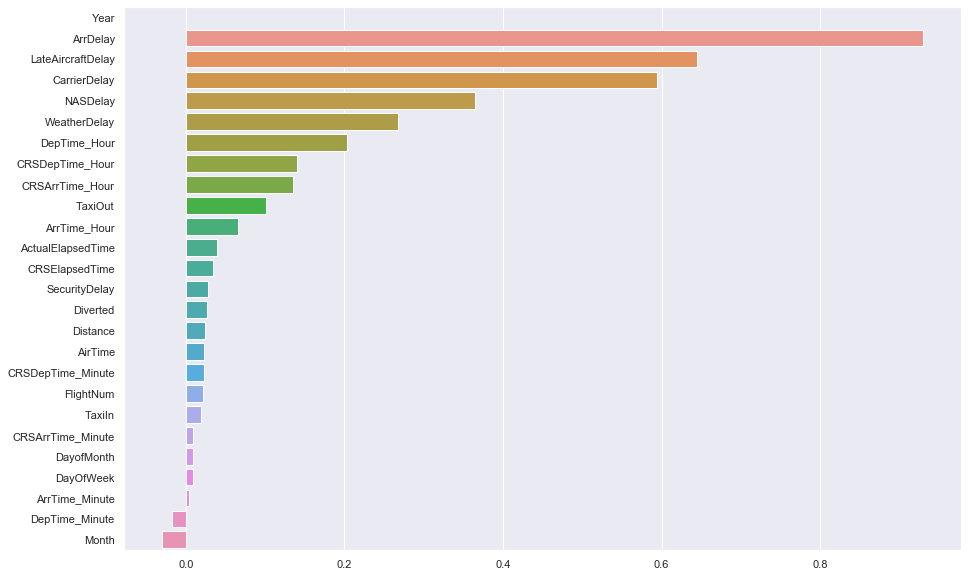

In [30]:
corr_graph(df_transformed_time)

In [31]:
df_cleared_2 = df_transformed_time.copy(deep=True)

# Исключены по заданию
df_cleared_2.drop(['TailNum', 'Year'], 1, inplace=True)

# Исключены потому что во многих случаях полностью составляют целевую переменную (суммарно и с пересечениями) и имеют много пропусков. 
df_cleared_2.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'] , 1, inplace=True)

# Большая корелляция с DepDelay
df_cleared_2.drop('ArrDelay', 1, inplace=True)

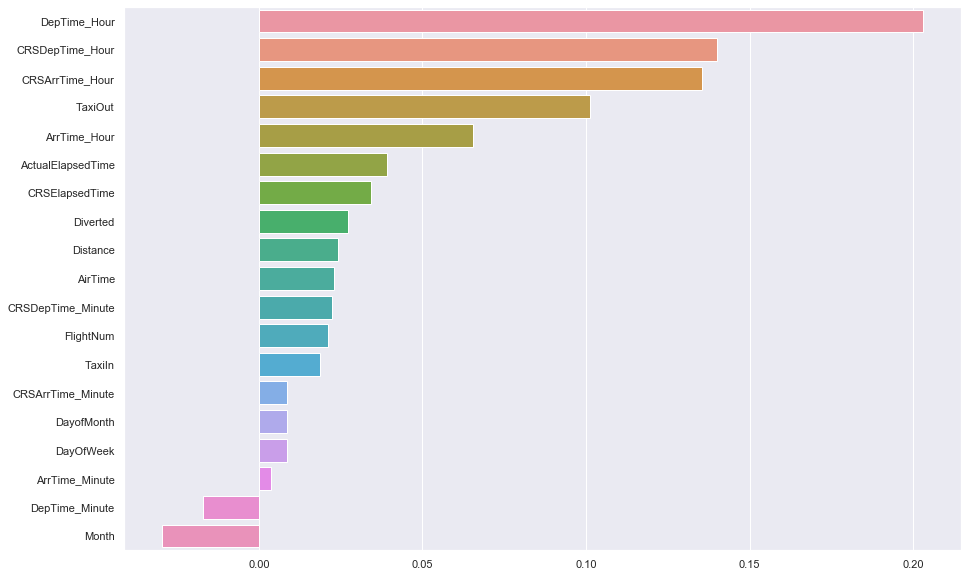

In [32]:
corr_graph(df_cleared_2)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

In [115]:
# Выполнил ниже

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [33]:
def df_without_na(df, col_name):
    return df[df[col_name].isna() == False]

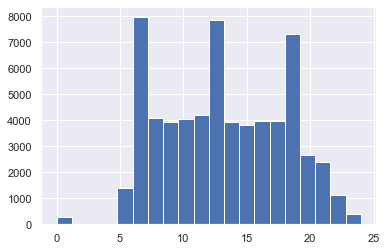

In [34]:
X = df_without_na(df_cleared_2, 'DepTime_Hour')
X['DepTime_Hour'].hist(bins=20)

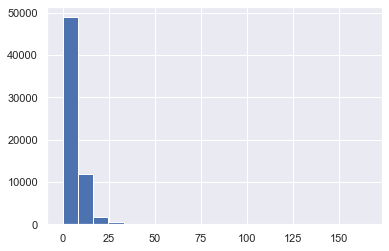

In [35]:
X = df_without_na(df_cleared_2, 'TaxiIn')
X['TaxiIn'].hist(bins=20)

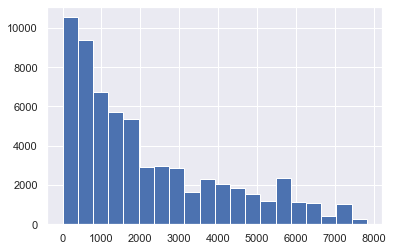

In [36]:
X = df_without_na(df_cleared_2, 'FlightNum')
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

**Ответ:** данные очень сильно разбросаны, нужно произвести масштабирование.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [37]:
from sklearn.preprocessing import StandardScaler

def fill_na_and_zero(data, numeric_features, category_features):
    data_tmp = data.copy(deep=True)
    data_tmp[numeric_features] = data_tmp[numeric_features].fillna(0)
    data_tmp[category_features] = data_tmp[category_features].fillna('nan')            
    return data_tmp

def scale_numeric(data, numeric_features):
    data_tmp = data.copy(deep=True)
    if len(numeric_features) != 0:
        data_tmp[numeric_features] = StandardScaler().fit_transform(data_tmp[numeric_features])
#         scaler = StandardScaler()
#         scaler.fit(numeric_data)
#         data_tmp[numeric_features] = scaler.transform(numeric_data)
    return data_tmp

def code_category(data, category_features):
    data_tmp = data.copy(deep=True)
    if len(category_features) != 0:
        category_data = pd.get_dummies(data_tmp[category_features], prefix=category_features)
        data_tmp = pd.concat([data_tmp, category_data], axis=1).drop(category_features, axis=1)
    return data_tmp

def transform_data(data):
    data_tmp = data.copy(deep=True)
    numeric_features = list(data_tmp.select_dtypes(np.number).columns)
    category_features = list(data_tmp.select_dtypes(np.object).columns)
    data_tmp = fill_na_and_zero(data_tmp, numeric_features, category_features)
    data_tmp = scale_numeric(data_tmp, numeric_features)
    data_tmp = code_category(data_tmp, category_features)
    return data_tmp

In [ ]:
def transform_data(data):
    data_tmp = data.copy(deep=True)
    
    numeric_data = data_tmp.select_dtypes(np.number)
    numeric_features = list(numeric_data.columns)
    category_data = data_tmp.select_dtypes(np.object)
    category_features = list(category_data.columns)
    
    data_tmp[numeric_features] = numeric_data.fillna(0)
    data_tmp[category_features] = category_data.fillna('nan')
    
    if len(numeric_features) != 0:
        data_tmp[numeric_features] = StandardScaler().fit_transform(numeric_data)
    
    if len(category_features) != 0:
        category_data = pd.get_dummies(category_data, prefix=category_features)
        data_tmp = pd.concat([data_tmp, category_data], axis=1).drop(category_features, axis=1)
    
    return data_tmp

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

Количество признаков после преобразования данных: 633


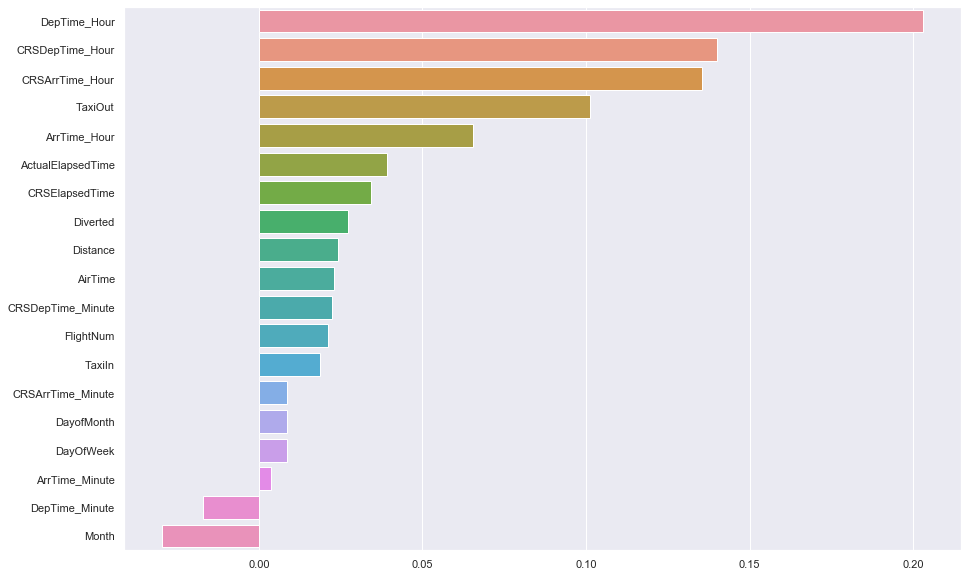

In [38]:
transformed_data = transform_data(df_cleared_2)
print('Количество признаков после преобразования данных:', transformed_data.shape[1])
corr_graph(transformed_data, df_cleared_2.select_dtypes([np.number]).columns)

In [39]:
df_cleared_2

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,...,TaxiOut,Diverted,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,MDW,CLE,...,8.0,0,21.0,11.0,20,55,23.0,8.0,23,0
1,6,4,3,XE,2380,124.0,138.0,108.0,IAH,AVL,...,12.0,0,14.0,26.0,14,10,17.0,30.0,17,28
2,8,3,7,WN,1769,138.0,155.0,125.0,MDW,TPA,...,9.0,0,11.0,43.0,11,45,15.0,1.0,15,20
3,1,23,3,OO,3802,102.0,111.0,79.0,SLC,FCA,...,19.0,0,11.0,41.0,11,44,13.0,23.0,13,35
4,5,4,7,WN,399,148.0,160.0,136.0,LAS,AUS,...,8.0,0,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,1,26,6,OH,5218,110.0,113.0,85.0,CVG,BDL,...,13.0,0,9.0,20.0,9,25,11.0,10.0,11,18
63400,5,12,1,DL,794,128.0,129.0,86.0,ORD,ATL,...,20.0,0,18.0,29.0,18,40,21.0,37.0,21,49
63401,5,11,7,OO,6159,47.0,49.0,30.0,ORD,GRR,...,13.0,0,11.0,49.0,11,25,13.0,36.0,13,14
63402,2,18,1,NW,641,234.0,219.0,192.0,RSW,MSP,...,22.0,0,19.0,6.0,19,0,22.0,0.0,21,39


In [40]:
transformed_data

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.744130,-0.786908,-0.741204,...,0,0,0,0,0,0,0,0,0,0
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,0.183961,-0.582387,-0.389769,...,0,0,0,0,0,0,0,0,0,0
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,0.471018,-0.582387,-0.653345,...,0,0,0,0,0,0,0,0,0,0
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.347886,-0.582387,0.225242,...,0,0,0,0,0,0,0,0,0,0
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,0.634799,-0.582387,-0.741204,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.120706,1.053782,-0.301910,...,0,0,0,0,0,0,0,0,0,0
63400,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.217566,3.098994,0.313101,...,0,0,0,0,0,0,0,0,0,0
63401,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,-1.043514,-0.582387,-0.301910,...,0,0,0,0,0,0,0,0,0,0
63402,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,1.208912,2.689951,0.488818,...,0,0,0,0,0,0,0,0,0,0


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [41]:
from sklearn.model_selection import train_test_split

X = np.array(transformed_data)
Y = np.array(tv)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train_valid = X_train[1000:]
X_train = X_train[:1000]

Y_train_valid = Y_train[1000:]
Y_train = Y_train[:1000]

reg = LinearRegression().fit(X_train, Y_train)

# print('Coef_:\n', reg.coef_)
# print('Intercept_:\n', reg.intercept_)

Тренировочная выборка:

In [43]:
predictions = reg.predict(X_train)
print("MSE подвыборки:", mean_squared_error(Y_train, predictions))
print("R^2 подвыборки:", reg.score(X_train, Y_train))
print("R^2 подвыборки:", r2_score(Y_train, predictions))

MSE подвыборки: 563.7711348592809
R^2 подвыборки: 0.46804843678545904
R^2 подвыборки: 0.46804843678545904


Валидационная выборка:

In [44]:
valid_predictions = reg.predict(X_train_valid)
print("MSE контрольной выборки:", mean_squared_error(Y_train_valid, valid_predictions))
print("R^2 контрольной выборки:", reg.score(X_train_valid, Y_train_valid))
print("R^2 контрольной выборки:", r2_score(Y_train_valid, valid_predictions))

MSE контрольной выборки: 1480.853546174412
R^2 контрольной выборки: -0.14975588408486695
R^2 контрольной выборки: -0.14975588408486695


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

__18. (1 балл)__ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [45]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV, cross_val_predict

In [46]:
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)
ridge_model = Ridge()
ridge_model.fit(X_train, Y_train)

# Близкими к нулю считаем числа, которые меньше, чем число 10^-10.
print("Количество коэффициентов близких к 0 при Lasso:", np.sum(np.abs(lasso_model.coef_) < 10 ** (-10)))
print("Количество коэффициентов близких к 0 при Ridge:", np.sum(np.abs(ridge_model.coef_) < 10 ** (-10)))

Количество коэффициентов близких к 0 при Lasso: 626
Количество коэффициентов близких к 0 при Ridge: 280


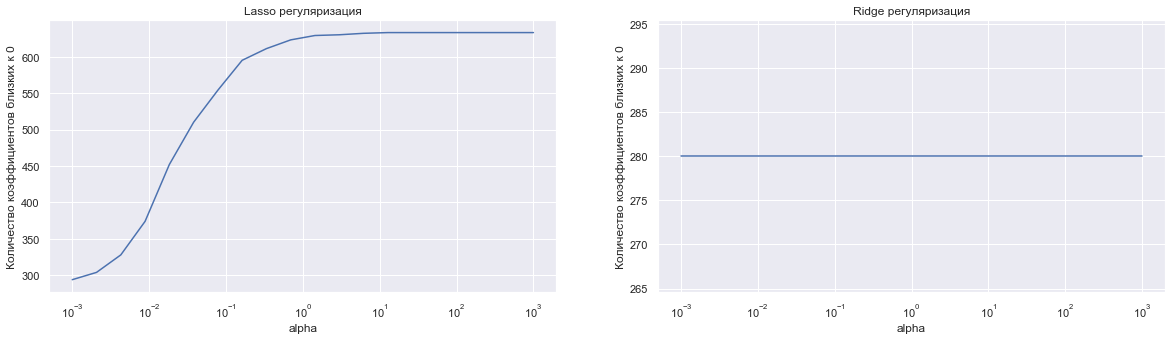

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (20, 5))

ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Количество коэффициентов близких к 0")
ax[0].set_title("Lasso регуляризация")
ax[0].set_xscale('log')

ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Количество коэффициентов близких к 0")
ax[1].set_title("Ridge регуляризация")
ax[1].set_xscale('log')

alphas = 10 ** np.linspace(-3, 3, 20)
lasso_zeros_amount = []
ridge_zeros_amount = []
for alpha in alphas:
    lasso_model = Lasso(alpha = alpha, max_iter=10**5)
    lasso_model.fit(X_train, Y_train)
    ridge_model = Ridge(alpha = alpha)
    ridge_model.fit(X_train, Y_train)
    lasso_zeros_amount.append(np.sum(np.abs(lasso_model.coef_) < 10 ** (-10)))
    ridge_zeros_amount.append(np.sum(np.abs(ridge_model.coef_) < 10 ** (-10)))
    
ax[0].plot(alphas, lasso_zeros_amount)
ax[1].plot(alphas, ridge_zeros_amount)

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [48]:
def get_ridge_metrics(X_train, Y_train, X_test, Y_test, alpha = 1.0):
    ridge_model = Ridge(alpha = alpha)
    ridge_model.fit(X_train, Y_train)
    predictions = reg.predict(X_test)
    rmse = mean_squared_error(Y_test, predictions, squared = False)
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    return rmse, mae, r2

def show_ridge_metrics(X_train, Y_train, X_test, Y_test, alpha = 1.0):
    rmse, mae, r2 = get_ridge_metrics(X_train, Y_train, X_test, Y_test, alpha = alpha)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R^2:", r2)

In [49]:
show_ridge_metrics(X_train, Y_train, X_train_valid, Y_train_valid)

RMSE: 38.48185996251237
MAE: 22.477144169429035
R^2: -0.14975588408486695


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

Лучний коэффициент регуляризации alpha для neg_root_mean_squared_error = 53.366992312063125
RMSE: 39.333836806095725
MAE: 22.61312825621872
R^2: -0.15660208927241137
Лучний коэффициент регуляризации alpha для neg_mean_absolute_error = 93.26033468832199
RMSE: 39.333836806095725
MAE: 22.61312825621872
R^2: -0.15660208927241137
Лучний коэффициент регуляризации alpha для r2 = 70.54802310718645
RMSE: 39.333836806095725
MAE: 22.61312825621872
R^2: -0.15660208927241137


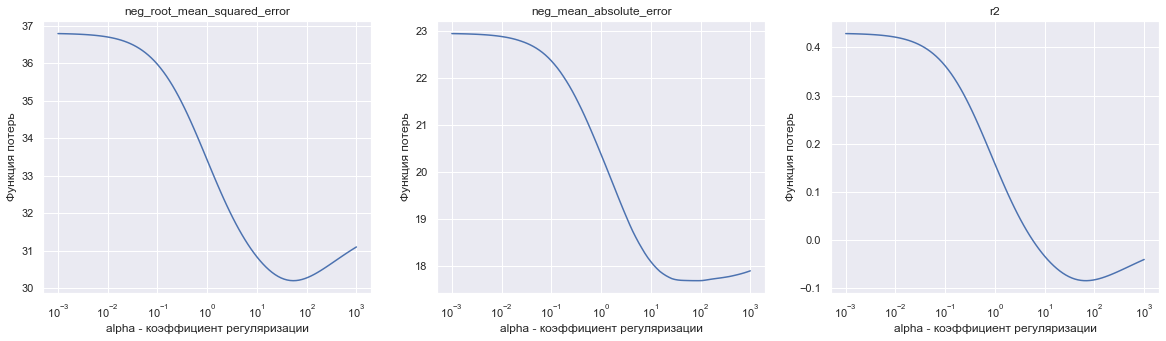

In [50]:
from sklearn.model_selection import GridSearchCV

scorings = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']
best_alphas = {}

fig, axes = plt.subplots(nrows=1, ncols=len(scorings), figsize = (20, 5))
alphas = 10 ** np.linspace(-3, 3, 100)

for i, scoring in enumerate(scorings):
    # cv – перекрёстная кросс-валидация (K-Fold cross-validation).
    # Так как cv задается параметром в GridSearchCV, использовать KFold из sklearn не нужно.
    searcher = GridSearchCV(Ridge(), [{'alpha': alphas}], scoring = scoring, cv = 5)
    searcher.fit(X_train, Y_train)
    axes[i].plot(alphas, -searcher.cv_results_['mean_test_score'])
    axes[i].set_xscale('log')
    axes[i].set_xlabel('alpha - коэффициент регуляризации')
    axes[i].set_ylabel('Функция потерь')
    axes[i].set_title(scoring)
    best_alphas[scoring] = searcher.best_params_["alpha"]
    print('Лучний коэффициент регуляризации alpha для', scoring, '=', best_alphas[scoring])
    show_ridge_metrics(X_train, Y_train, X_test, Y_test, alpha = best_alphas[scoring])

**Вывод:** выбор метрики ошибки не повлиял на результат, сами же результаты не сильно отличаются от метрики при alpha=1.0.

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

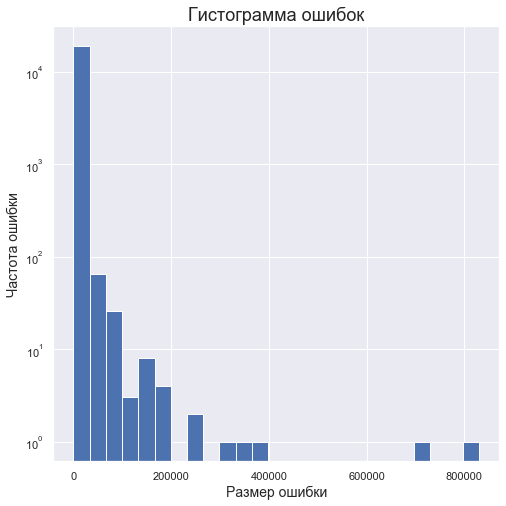

In [51]:
fig, ax = plt.subplots(figsize = (8, 8))

best_alpha = np.array(list(best_alphas.values())).mean()

ridge = Ridge(alpha = best_alpha)
predictions = cross_val_predict(ridge, X_test, Y_test)
error = (predictions - Y_test) ** 2
ax.hist(error, bins = 25)
ax.set_yscale("log")
ax.set_title("Гистограмма ошибок", fontsize = 18)
ax.set_xlabel('Размер ошибки', fontsize = 14)
ax.set_ylabel('Частота ошибки', fontsize = 14)

plt.show()

**Вывод:** более частыми стали маленькие ошибки.